In [1]:
pip install emojis

In [2]:
pip install tashaphyne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 12.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
import sys

In [4]:
from google.colab import userdata
token = userdata.get('HF_TOKEN')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
sys.path.append('/content/drive/MyDrive')

In [ ]:
splits = {'train': 'data/train-00000-of-00001.parquet', 'validation': 'data/validation-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/Abdelrahman-Rezk/Arabic_Dialect_Identification/" + splits["train"])

In [ ]:
df.to_csv("dataset.csv", index=False, encoding='utf8')

In [ ]:
validation = pd.read_parquet("hf://datasets/Abdelrahman-Rezk/Arabic_Dialect_Identification/" + splits["validation"])
validation

,id,label,text
0,910595516496515200,3,@A_E_92 استاذ عبدالعزيز صارله الموضوع سنه يعن...
1,847921262752129024,6,#كذبة_نيسان كل عام والكذاب بألف خير 🙈😂 https:/...
2,1138977052055560192,10,@basitooo5 طمطم عاااتى طبق جبنة 🙄
3,978901748604645376,15,@alsyasiyeh @alsyaaf يمكن متلاحقين السوق بيشتر...
4,838068478179430400,3,@A_A_AlTammar عيل المدرب حمار حشاك .. مالها حل...
...,...,...,...
9159,1154583936523284480,3,@mohdfheed الله يشافيه ويعافيه ويكتب اجرك يبو ...
9160,1139550319241773056,3,@Naifalnemah تعال شوفني احسن من الفلم الهندي \...
9161,1004448814609129600,11,النااس اللي بتبني جديد \nقبل ما تعملوا تمديدات...
9162,1122824694229553152,13,@allyaa24 كثروا مثل الذبان في موسم الصيف🙂💔


In [ ]:
test = pd.read_parquet("hf://datasets/Abdelrahman-Rezk/Arabic_Dialect_Identification/" + splits["test"])
test

,id,label,text
0,1159906099585327104,10,ايه الخيبة و الهرتلة قدام الجون دول؟؟ 🤪😲\nالعي...
1,950123809608171648,14,@FIA_WIS تذكرت ما اسمي عائشة انا اسمي خولة
2,1091295506960142336,2,@showqiy @3nood_mh لا والله نروح نشجع قطر و نف...
3,1179845110718181376,14,@espoir_dz1 يسلملي قلبك ولد مدينتي
4,1011983655546302464,10,ملخص مؤتمر أبو سبوبة، قصدي أبو ريدة....احنا عم...
...,...,...,...
8976,1141240000253759616,5,وجدّي كان يطحن للحي\n\nقمح وسهريات
8977,504915500737232896,1,الشي البضحك ويفقع المرارة انو كل دين سياسة منه...
8978,1063264861029891968,0,@alkalbani2007 مجرد تمني....وهذا متاح ومسموح.\...
8979,898279689558667264,10,نسي يقول صوت رنه ال messenger 😂 https://t.co/R...


In [ ]:
validation.to_csv("validation.csv", index=False, encoding="utf8")
test.to_csv("test.csv", index=False, encoding="utf8")

In [ ]:
from preprocessing_data import *

id_col = "id"
dialects_col = "label"
text_c = "text"
original_file = "/content/dataset.csv"
test_file = "/content/test.csv"
validation_file = "/content/validation.csv"
saved_file = "dataset_preprocessed.csv"
_ = arabic_preprocess_pipline(original_file, saved_file, id_col, text_c, dialects_col, labels_encoded=False ,using_lemma=False)

Number of instances in the file are:  440052
Some samples of text after preprocessed it:
['حسابشخصي اتمني صراحه و خصوصا #طال_عمره بينا وبينه قصه عشق قديمه 😍 ', 'حسابشخصي حسابشخصي طبعا عرفته من اللي بشعار الليڤر', 'حسابشخصي حسابشخصي حسابشخصي حسابشخصي هيه هيه م يتغير شي . . كلهم ع بعضهم متولفين 😪 . . بيجيك مدير فرع قريب منك عشان يتساعد معك عشان بس يثبت جدارته لوظيفيه فكرسيه ويحاول يتعاون معك لكن فالنهايه بترجع ع نفس المشكله والدائره تدور لا بيقدموا ولا بياخروا 😪 . . وحدي غاسله ايدي منهم', 'كلب شو كنتوا بتتوقعوا منه ! ؟ محمود عباس لا يمثل الا نفسه . ', '#عزام 🔊 احنا ابو الولد وام الولد']
Number of instances in our new file are:  440052
Our Arabic preprocess pipeline is work without any error.


In [ ]:
original_file = validation_file
saved_file2 = "valdataset_preprocessed.csv"
_ = arabic_preprocess_pipline(original_file, saved_file2, id_col, text_c, dialects_col, labels_encoded=False, using_lemma=False)
val_dataset = pd.read_csv(saved_file2)

Number of instances in the file are:  9164
Some samples of text after preprocessed it:
['حسابشخصي استاذ عبدالعزيز صارله الموضوع سنه يعني متي اراجع التامينات', '#كذبه_نيسان كل عام والكذاب بالف خير 😂 رابطويب', 'حسابشخصي طمطم عااتي طبق جبنه 🙄 ', 'حسابشخصي حسابشخصي يمكن متلاحقين السوق بيشترون سمك للغداء 😋 ', 'حسابشخصي عيل المدرب حمار حشاك . . مالها حل ثالث . هم بعد صح كلامك الاحتمال الثاني واارد جداا 🤔 ']
Number of instances in our new file are:  9164
Our Arabic preprocess pipeline is work without any error.


In [ ]:
new_dataset = pd.read_csv(saved_file)
new_dataset

,id,dialect,dialect_l_encoded,text
0,1046024946705735552,MA,9,حسابشخصي اتمني صراحه و خصوصا #طال_عمره بينا وب...
1,1140189387508134016,YE,17,حسابشخصي حسابشخصي طبعا عرفته من اللي بشعار الليڤر
2,1051416181855440768,AE,0,حسابشخصي حسابشخصي حسابشخصي حسابشخصي هيه هيه م ...
3,781770259422412800,PL,11,كلب شو كنتوا بتتوقعوا منه ! ؟ محمود عباس لا يم...
4,968140551366340608,PL,11,#عزام 🔊 احنا ابو الولد وام الولد
...,...,...,...,...
440047,1024415002810306560,KW,6,انت مش مجبور تجامل حدا وتعطيه اكبر من حجمه ؛ ع...
440048,825422832138067968,EG,3,رتم الفريق بدون جيرو سرييع ، مع جيرو يصير بطيي...
440049,1137082760726810624,DZ,2,🇸🇦 ksa 👆 🏻 وغير هالبلد قلبي ما عشق ولا راح يع...
440050,1075003837436575616,PL,11,حسابشخصي حسابشخصي خلص اذا هييك بطلت ادعي واعطي...


In [ ]:
new_dataset.head()

,id,dialect,dialect_l_encoded,text
0,1046024946705735552,MA,9,حسابشخصي اتمني صراحه و خصوصا #طال_عمره بينا وب...
1,1140189387508134016,YE,17,حسابشخصي حسابشخصي طبعا عرفته من اللي بشعار الليڤر
2,1051416181855440768,AE,0,حسابشخصي حسابشخصي حسابشخصي حسابشخصي هيه هيه م ...
3,781770259422412800,PL,11,كلب شو كنتوا بتتوقعوا منه ! ؟ محمود عباس لا يم...
4,968140551366340608,PL,11,#عزام 🔊 احنا ابو الولد وام الولد


In [ ]:
val_dataset

,id,dialect,dialect_l_encoded,text
0,910595516496515200,EG,3,حسابشخصي استاذ عبدالعزيز صارله الموضوع سنه يعن...
1,847921262752129024,KW,6,#كذبه_نيسان كل عام والكذاب بالف خير 😂 رابطويب
2,1138977052055560192,OM,10,حسابشخصي طمطم عااتي طبق جبنه 🙄
3,978901748604645376,SY,15,حسابشخصي حسابشخصي يمكن متلاحقين السوق بيشترون ...
4,838068478179430400,EG,3,حسابشخصي عيل المدرب حمار حشاك . . مالها حل ثال...
...,...,...,...,...
9159,1154583936523284480,EG,3,حسابشخصي الله يشافيه ويعافيه ويكتب اجرك يبو فهيد
9160,1139550319241773056,EG,3,حسابشخصي تعال شوفني احسن من الفلم الهندي لك وح...
9161,1004448814609129600,PL,11,الناس اللي بتبني جديد قبل ما تعملوا تمديدات ال...
9162,1122824694229553152,SA,13,حسابشخصي كثروا مثل الذبان في موسم الصيف 💔


In [ ]:
val_dataset.head()

,id,dialect,dialect_l_encoded,text
0,910595516496515200,EG,3,حسابشخصي استاذ عبدالعزيز صارله الموضوع سنه يعن...
1,847921262752129024,KW,6,#كذبه_نيسان كل عام والكذاب بالف خير 😂 رابطويب
2,1138977052055560192,OM,10,حسابشخصي طمطم عااتي طبق جبنه 🙄
3,978901748604645376,SY,15,حسابشخصي حسابشخصي يمكن متلاحقين السوق بيشترون ...
4,838068478179430400,EG,3,حسابشخصي عيل المدرب حمار حشاك . . مالها حل ثال...


In [ ]:
pip install nltk

In [ ]:
# def prepare_data(data):
#     '''
#     The function used to prepare the data we will use as features(text),
#     and the corresponding class associated with that text.

#     Argument
#         data         : dataframe, the data you need to split into training and validation.

#     Return
#         x_train_text : list, the training data we need to train our model on, but need to prepared as numbers.
#         x_val_text   : list, the Validation data we need to validate the model trained on, but need to prepared as numbers.
#         y_train      : array, the corresponding label for each text.
#         y_val        : array, the corresponding label for each text.
#     '''

#     # Get the splited training and validation datasets.
#     # functionfrom Stratified_split_and_shuffle function defined in data_shuffling_split file
#     x_train, x_val = Stratified_split_and_shuffle(data, "dialect", split_percentage=.02)

#     # Separate text into lists
#     x_train_text, x_val_text = list(x_train['text']), list(x_val['text'])

#     # Separate labels into arrays as .values return numpy array
#     y_train, y_val = x_train['dialect_l_encoded'].values, x_val['dialect_l_encoded'].values

#     # Display some info after splitting
#     print("The number of trainin instances: ", len(x_train_text))
#     print("The number of validation instances: ",len(x_val_text))
#     print("The number of trainin labels : ", len(y_train))
#     print("The number of validation labels : ", len(y_val))

#     return x_train_text, x_val_text, y_train, y_val

Average words in a tweet

In [ ]:
sum = 0
for text in new_dataset["text"]:
    sum += len(str(text).split())
avg = sum / len(new_dataset["text"])
avg

15.961004608546263

Loading dataset

In [7]:
new_dataset = pd.read_csv("/content/dataset_preprocessed.csv")
val_dataset = pd.read_csv("/content/valdataset_preprocessed.csv")

Prepare data to train

In [8]:
from sklearn.model_selection import train_test_split

x = new_dataset[:115000].drop("dialect_l_encoded", axis=1)
y = new_dataset[:115000]["dialect_l_encoded"]
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

x_train = x_train["text"]
x_val = x_val["text"]
# y_train = new_dataset["dialect_l_encoded"]
# y_val = val_dataset["dialect_l_encoded"]

print(f"Number of data to train: {len(x_train)}")
print(f"number of data to validate: {len(x_val)}")
print(f"Number of labels to train: {len(y_train)}")
print(f"number of labels to validate: {len(y_val)}")

x_train_text = x_train.reset_index(drop=True)
x_val_text = x_val.reset_index(drop=True)

Number of data to train: 92000
number of data to validate: 11500
Number of labels to train: 92000
number of labels to validate: 11500


In [9]:
x_train_text.head()

,text
0,باش نمشي لمصر توا . . . . . 🤠 رابطويب
1,حسابشخصي حسابشخصي حسابشخصي سائده—سفرجل—سلحفاه—...
2,ابن صفي الغالي 😍 كل عام وانت بخير ، العمر كلو ...
3,حسابشخصي علا تعود من جديد 😂 بس اتفق معاكي اصل ...
4,هذا مريض بس فنان . . والا فنان بس مريض ؟ 😅 راب...


In [10]:
x_val_text.head()

,text
0,حسابشخصي هذي مويه نار ماراح يبقي له لسان يذوبه هه
1,احدي العواقب اللي كانت عندي و اصعبها كوني انا ...
2,تخيل علشان تدخل الحمام تدفع 5 شيكل ( 1 يورو ) ...
3,احلي شعور لما تبدي تمارس الرياضه وجسمك مخشب . ...
4,سبحان الله السياسه شو الها تاثير عنفسيه اللبنانين


In [11]:
def display_text_before_tokenization(text_list):
  before_tokenization = []
  for sentence in text_list[:4]:
    before_tokenization.append(sentence)
  print("Text before tokenization")
  print(before_tokenization)

Tokenization and stemming

In [12]:
from nltk.tokenize import TreebankWordTokenizer

def treebank_tokenization(text_list):
  display_text_before_tokenization(text_list)
  tree_tokenizer = TreebankWordTokenizer()
  tokenized_text = []
  for text in text_list:
    tokenized_text.append(tree_tokenizer.tokenize(text))
  print("Text after tokenization")
  print(tokenized_text[:4])
  return tokenized_text

In [13]:
from tashaphyne.stemming import ArabicLightStemmer

def arabic_porter_stemmer(text_list):
  stemmed_text = []
  for text in text_list:
    stemmed_sentence = []
    for word in text:
      Arabic_stemmer = ArabicLightStemmer()
      Arabic_stemmer.light_stem(word)
      stemmed_sentence.append(Arabic_stemmer.get_stem())
    stemmed_text.append(stemmed_sentence)

  print("before")
  print(text_list[:4])
  print("after")
  print(stemmed_text[:4])

In [14]:
tokenized_train_text = treebank_tokenization(x_train_text)
tokenized_val_text = treebank_tokenization(x_val_text)

Text before tokenization
['باش نمشي لمصر توا . . . . . 🤠 رابطويب', 'حسابشخصي حسابشخصي حسابشخصي سائده—سفرجل—سلحفاه—سن—سوريا', 'ابن صفي الغالي 😍 كل عام وانت بخير ، العمر كلو يا رب ❤️ حسابشخصي', 'حسابشخصي علا تعود من جديد 😂 بس اتفق معاكي اصل اللي ماشي اليومين بيكون غير كدا خالص 😅 ']
Text after tokenization
[['باش', 'نمشي', 'لمصر', 'توا', '.', '.', '.', '.', '.', '🤠', 'رابطويب'], ['حسابشخصي', 'حسابشخصي', 'حسابشخصي', 'سائده—سفرجل—سلحفاه—سن—سوريا'], ['ابن', 'صفي', 'الغالي', '😍', 'كل', 'عام', 'وانت', 'بخير', '،', 'العمر', 'كلو', 'يا', 'رب', '❤️', 'حسابشخصي'], ['حسابشخصي', 'علا', 'تعود', 'من', 'جديد', '😂', 'بس', 'اتفق', 'معاكي', 'اصل', 'اللي', 'ماشي', 'اليومين', 'بيكون', 'غير', 'كدا', 'خالص', '😅']]
Text before tokenization
['حسابشخصي هذي مويه نار ماراح يبقي له لسان يذوبه هه', 'احدي العواقب اللي كانت عندي و اصعبها كوني انا من الاردن و مغترب في السعوديه و هي من الضفه و كان من المستحيل اني اقدر انزل اتقدم الها بسبب ظروف الجغرافيه و السياسيه بالمنطقه في فلسطين ! فرق العمر بينا و اللي بنظر الها الم

In [23]:
# stemmed_train_text = arabic_porter_stemmer(tokenized_train_text)
# stemmed_val_text = arabic_porter_stemmer(tokenized_val_text)

In [15]:
pip install tensorflow

Loading the AraVec embedding model

In [16]:
from gensim import *

ara_vec = models.Word2Vec.load("/content/drive/MyDrive/AraVec model/full_grams_cbow_100_twitter.mdl")
token = "مرحبا"

This is the embedding of the word "مرحبا " every word will have a vector size of 100

In [17]:
ara_vec.wv[token]

array([ 7.8940596e-03, -1.9478461e+00,  1.1631009e-02, -3.5182920e+00,
       -1.2167654e+00,  3.1339860e+00,  1.5371485e+00, -1.8152795e+00,
       -1.2115160e+00, -3.5992939e+00,  2.4862409e-01,  2.7312357e+00,
        8.0305028e-01, -4.1077638e-01, -1.6454821e+00, -1.0270128e+00,
        2.4021879e-01, -1.9182550e+00, -4.1562691e+00, -2.7357066e-01,
        3.6352795e-01, -5.0566471e-01, -1.8600090e+00, -3.6048862e-01,
        2.0769353e+00,  1.6658021e-02,  2.4419727e+00, -1.1157359e+00,
       -1.1297592e+00, -5.2575749e-01,  5.4749495e-01,  1.1458756e+00,
        7.8666162e-01, -2.6775408e-01,  4.9869961e-01, -9.9649131e-01,
       -1.2755750e+00, -2.9144409e-01, -1.9790000e+00, -7.6061869e-01,
       -2.2856839e+00, -2.2579525e+00,  1.1075810e+00,  1.2388148e+00,
       -2.0124793e-01,  7.2702956e-01,  6.1502811e-02,  1.2161491e+00,
        1.7231876e-01, -5.2533872e-02, -2.7908528e+00, -2.1365383e+00,
       -1.8886662e+00,  7.3253202e-01,  4.2989811e-01,  1.0156611e+00,
      

In [18]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [19]:
import tensorflow as tf

# Verify GPU usage
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [20]:
from tensorflow import keras
from keras.preprocessing.sequence import pad_sequences
import numpy as np
def get_embedding_matrix(text_list, maxlen, batch_size=10000):
    cterror = 0
    outofvocab_words = []
    padded_batches = []

    for i in range(0, len(text_list), batch_size):
        batch = text_list[i:i+batch_size]
        batch_embds = []

        for text in batch:
            sentence_embds = []
            for word in text:
                try:
                    sentence_embds.append(ara_vec.wv[word])
                except KeyError:
                  if word not in outofvocab_words:
                    outofvocab_words.append(word)
            batch_embds.append(sentence_embds)

        # Pad and store the current batch
        padded_batches.append(pad_sequences(batch_embds, maxlen=maxlen, padding="post", dtype="float16"))

    print(f"Number of Out Of Vocab words: {len(outofvocab_words)}")

    # Concatenate all padded batches into one array
    text_embds = np.vstack(padded_batches)
    print(f"Embedded text shape: {text_embds.shape}")
    return text_embds


Embbeding

In [21]:
x_train_embds = get_embedding_matrix(tokenized_train_text, 64)

Number of Out Of Vocab words: 43352
Embedded text shape: (92000, 64, 100)


In [22]:
x_val_embds = get_embedding_matrix(tokenized_val_text, 64)

Number of Out Of Vocab words: 6300
Embedded text shape: (11500, 64, 100)


In [23]:
x_train_embds.shape

(92000, 64, 100)

In [24]:
x_val_embds.shape

(11500, 64, 100)

In [25]:
y_train = y_train.astype("int32")
# x_train_embds = x_train_embds.reshape(x_train_embds.shape[0], 64, 100)
# x_val_embds = x_val_embds.reshape(x_val_embds.shape[0], 64, 100)
print(y_train.shape)

(92000,)


Tokenizing and Embedding of the testing sample to calculate F1-score down bellow after each model

In [26]:
x_test = x_test["text"]

In [27]:
x_test_tokenized = treebank_tokenization(x_test)

Text before tokenization
['حسابشخصي طمع خاايب اوا ماشي بزاف اولو يخليه لولاد ولادو ♀️ ', 'حسابشخصي شو اسمو هالسوق او اسم المحل', 'ماحب المواد الي فيهم تواريخ ومادري شنو 🙂 mcm 401 ', 'حسابشخصي حسابشخصي بس اللي ما يشوف من الغربال اعمي']
Text after tokenization
[['حسابشخصي', 'طمع', 'خاايب', 'اوا', 'ماشي', 'بزاف', 'اولو', 'يخليه', 'لولاد', 'ولادو', '♀️'], ['حسابشخصي', 'شو', 'اسمو', 'هالسوق', 'او', 'اسم', 'المحل'], ['ماحب', 'المواد', 'الي', 'فيهم', 'تواريخ', 'ومادري', 'شنو', '🙂', 'mcm', '401'], ['حسابشخصي', 'حسابشخصي', 'بس', 'اللي', 'ما', 'يشوف', 'من', 'الغربال', 'اعمي']]


In [28]:
x_test = get_embedding_matrix(x_test_tokenized, 64)

Number of Out Of Vocab words: 6205
Embedded text shape: (11500, 64, 100)


Models

Note: There are two callbacks used one of them is early stopping which stops training the model if the validation loss didn't improve for (if patience=5) 5 epochs since the best validation reached

model checkpoint saves the model when reaching better weights and continues training

LSTM_100 batch size 128 36 f1 score

In [29]:
from keras import layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Embedding, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

lstm_model = keras.models.Sequential([
    layers.Input(shape=(64, 100)),
    LSTM(128, return_sequences=True),
    LSTM(64, return_sequences=False),
    layers.Dropout(0.4),
    layers.Dense(64, activation="relu", kernel_regularizer="l2"),
    layers.Dense(18, activation="softmax"),
])

lstm_model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

In [30]:
checkpoint = ModelCheckpoint("LSTm_100.keras", save_best_only=True, monitor="val_loss", verbose=1)
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
history = lstm_model.fit(x_train_embds, y_train, batch_size=128, epochs=20, validation_data=(x_val_embds, y_val), callbacks=[checkpoint, early_stopping])
lstm_model.save("LSTm_100.h5")


Epoch 1/20
716/719 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1676 - loss: 2.8728
Epoch 1: val_loss improved from inf to 2.41612, saving model to LSTm_100.keras
719/719 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.1678 - loss: 2.8715 - val_accuracy: 0.2189 - val_loss: 2.4161
Epoch 2/20
716/719 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2442 - loss: 2.3533
Epoch 2: val_loss improved from 2.41612 to 2.28908, saving model to LSTm_100.keras
719/719 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.2443 - loss: 2.3532 - val_accuracy: 0.2544 - val_loss: 2.2891
Epoch 3/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2622 - loss: 2.2569
Epoch 3: val_loss improved from 2.28908 to 2.20206, saving model to LSTm_100.keras
719/719 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.2623 - loss: 2.2569 - val_accuracy: 0.2769 - val_loss: 2.2021
Epoch 4/20
718/719 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2830 - loss: 2.1831
Epoch 4: val_loss improved from 2.20206 to 2.10703,

In [35]:
from sklearn.metrics import f1_score
y_pred = np.argmax(lstm_model.predict(x_test), axis=1)
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class, 'binary' for binary
print("F1-Score:", round(f1, 5))

360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
F1-Score: 0.367


LSTM_2 batch size 256 42 f1-score

In [39]:
from keras import layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Embedding, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

lstm_model2 = keras.models.Sequential([
    layers.Input(shape=(64, 100)),
    LSTM(256, return_sequences=True),
    LSTM(128, return_sequences=False),
    layers.Dropout(0.2),
    layers.Dense(18, activation="softmax"),
])

lstm_model2.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.0004), metrics=["accuracy"])

In [40]:
checkpoint = ModelCheckpoint("LSTM_2.keras", save_best_only=True, monitor="val_loss", verbose=1)
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
history = lstm_model2.fit(x_train_embds, y_train, batch_size=128, epochs=20, validation_data=(x_val_embds, y_val), callbacks=[checkpoint, early_stopping])
lstm_model2.save("LSTM_2.h5")

Epoch 1/20
716/719 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2066 - loss: 2.4790
Epoch 1: val_loss improved from inf to 2.15180, saving model to LSTM_2.keras
719/719 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.2069 - loss: 2.4782 - val_accuracy: 0.2943 - val_loss: 2.1518
Epoch 2/20
718/719 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3080 - loss: 2.1004
Epoch 2: val_loss improved from 2.15180 to 1.97563, saving model to LSTM_2.keras
719/719 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.3080 - loss: 2.1003 - val_accuracy: 0.3521 - val_loss: 1.9756
Epoch 3/20
717/719 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3677 - loss: 1.9528
Epoch 3: val_loss improved from 1.97563 to 1.88946, saving model to LSTM_2.keras
719/719 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.3677 - loss: 1.9527 - val_accuracy: 0.3956 - val_loss: 1.8895
Epoch 4/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4021 - loss: 1.8519
Epoch 4: val_loss improved from 1.88946 to 1.85142, savi

just changing differrent names of models to save

In [41]:
from sklearn.metrics import f1_score
y_pred = np.argmax(lstm_model2.predict(x_test), axis=1)
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class, 'binary' for binary
print("F1-Score:", f1)

360/360 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
F1-Score: 0.4228627849918556


LSTM_3.h5

In [ ]:
from keras import layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Embedding, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

lstm_model3 = keras.models.Sequential([
    layers.Input(shape=(64, 100)),
    LSTM(256, return_sequences=True, recurrent_dropout=0.2),
    LSTM(128, return_sequences=False, recurrent_dropout=0.2),
    layers.Dropout(0.2),
    layers.Dense(18, activation="softmax"),
])

lstm_model3.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.0004), metrics=["accuracy"])

In [ ]:
checkpoint = ModelCheckpoint("LSTM_3.keras", save_best_only=True, monitor="val_loss", verbose=1)
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
history = lstm_model2.fit(x_train_embds, y_train, batch_size=256, epochs=20, validation_data=(x_val_embds, y_val), callbacks=[checkpoint, early_stopping])
lstm_model2.save("LSTM_3.h5")

In [ ]:
lstm_model2.save("LSTM_2.h5")

LSTM with self attention 2

In [30]:
from keras import layers, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Embedding, LSTM, BatchNormalization, Attention
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

inputs = layers.Input(shape=(64, 100))
lstm_layer = LSTM(256, return_sequences=True, recurrent_dropout=0.2)(inputs)
lstm_attention = Attention()([lstm_layer, lstm_layer])
lstm2_layer = LSTM(128, return_sequences=False)(lstm_attention)
model_layers = Dropout(0.4)(lstm2_layer)
outputs = Dense(18, activation="softmax")(model_layers)

lstm_model5 = Model(inputs=inputs, outputs=outputs)

lstm_model5.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.0004), metrics=["accuracy"])

In [31]:
checkpoint = ModelCheckpoint("LSTm_selfattention2.keras", save_best_only=True, monitor="val_loss", verbose=1)
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
history = lstm_model5.fit(x_train_embds, y_train, batch_size=256, epochs=20, validation_data=(x_val_embds, y_val), callbacks=[checkpoint, early_stopping])
lstm_model5.save("LSTm_selfattention2.h5")

Epoch 1/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.2532 - loss: 2.3680
Epoch 1: val_loss improved from inf to 1.92426, saving model to LSTm_selfattention2.keras
360/360 ━━━━━━━━━━━━━━━━━━━━ 52s 122ms/step - accuracy: 0.2533 - loss: 2.3675 - val_accuracy: 0.3777 - val_loss: 1.9243
Epoch 2/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.3811 - loss: 1.9275
Epoch 2: val_loss improved from 1.92426 to 1.81333, saving model to LSTm_selfattention2.keras
360/360 ━━━━━━━━━━━━━━━━━━━━ 74s 112ms/step - accuracy: 0.3811 - loss: 1.9275 - val_accuracy: 0.4182 - val_loss: 1.8133
Epoch 3/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.4159 - loss: 1.8236
Epoch 3: val_loss improved from 1.81333 to 1.74699, saving model to LSTm_selfattention2.keras
360/360 ━━━━━━━━━━━━━━━━━━━━ 39s 107ms/step - accuracy: 0.4159 - loss: 1.8235 - val_accuracy: 0.4357 - val_loss: 1.7470
Epoch 4/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.4443 - loss: 1.7418
Epoch 4: v

In [32]:
from sklearn.metrics import f1_score
y_pred = np.argmax(lstm_model5.predict(x_test), axis=1)
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class, 'binary' for binary
print("F1-Score:", f1)

360/360 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step
F1-Score: 0.4542038019815656


In [ ]:
from sklearn.metrics import f1_score
y_pred = np.argmax(lstm_model5.predict(x_test), axis=1)
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class, 'binary' for binary
print("F1-Score:", f1)

LSTM self attention batch size 128

In [29]:
from keras import layers, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Embedding, LSTM, BatchNormalization, Attention
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

inputs = layers.Input(shape=(64, 100))
lstm_layer = LSTM(256, return_sequences=True, recurrent_dropout=0.2)(inputs)
lstm_attention = Attention()([lstm_layer, lstm_layer])
lstm2_layer = LSTM(128, return_sequences=False)(lstm_attention)
model_layers = Dropout(0.4)(lstm2_layer)
outputs = Dense(18, activation="softmax")(model_layers)

lstm_model5 = Model(inputs=inputs, outputs=outputs)

lstm_model5.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.0004), metrics=["accuracy"])

In [30]:
checkpoint = ModelCheckpoint("LSTm_selfattention2.keras", save_best_only=True, monitor="val_loss", verbose=1)
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
history = lstm_model5.fit(x_train_embds, y_train, batch_size=128, epochs=20, validation_data=(x_val_embds, y_val), callbacks=[checkpoint, early_stopping])
lstm_model5.save("LSTm_selfattention2.h5")

Epoch 1/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.2712 - loss: 2.3004
Epoch 1: val_loss improved from inf to 1.87455, saving model to LSTm_selfattention2.keras
719/719 ━━━━━━━━━━━━━━━━━━━━ 93s 116ms/step - accuracy: 0.2713 - loss: 2.3001 - val_accuracy: 0.3953 - val_loss: 1.8746
Epoch 2/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.3980 - loss: 1.8787
Epoch 2: val_loss improved from 1.87455 to 1.79625, saving model to LSTm_selfattention2.keras
719/719 ━━━━━━━━━━━━━━━━━━━━ 135s 113ms/step - accuracy: 0.3980 - loss: 1.8787 - val_accuracy: 0.4268 - val_loss: 1.7963
Epoch 3/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.4356 - loss: 1.7641
Epoch 3: val_loss improved from 1.79625 to 1.71089, saving model to LSTm_selfattention2.keras
719/719 ━━━━━━━━━━━━━━━━━━━━ 81s 112ms/step - accuracy: 0.4356 - loss: 1.7641 - val_accuracy: 0.4537 - val_loss: 1.7109
Epoch 4/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.4612 - loss: 1.6863
Epoch 4: 

In [31]:
from sklearn.metrics import f1_score
y_pred = np.argmax(lstm_model5.predict(x_test), axis=1)
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class, 'binary' for binary
print("F1-Score:", f1)

360/360 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step
F1-Score: 0.46637895448194555


LSTM self attention 22

In [29]:
from keras import layers, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Embedding, LSTM, BatchNormalization, Attention
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

inputs = layers.Input(shape=(64, 100))
lstm_layer = LSTM(256, return_sequences=True, recurrent_dropout=0.2)(inputs)
lstm_attention = Attention()([lstm_layer, lstm_layer])
lstm2_layer = LSTM(128, return_sequences=False, recurrent_dropout=0.2)(lstm_attention)
model_layers = Dropout(0.2)(lstm2_layer)
outputs = Dense(18, activation="softmax")(model_layers)

lstm_model52 = Model(inputs=inputs, outputs=outputs)

lstm_model52.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.0005), metrics=["accuracy"])

In [30]:
checkpoint = ModelCheckpoint("LSTm_selfattention22.keras", save_best_only=True, monitor="val_loss", verbose=1)
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
history = lstm_model52.fit(x_train_embds, y_train, batch_size=256, epochs=20, validation_data=(x_val_embds, y_val), callbacks=[checkpoint, early_stopping])
lstm_model52.save("LSTm_selfattention22.h5")

Epoch 1/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.2701 - loss: 2.3057
Epoch 1: val_loss improved from inf to 1.88072, saving model to LSTm_selfattention22.keras
360/360 ━━━━━━━━━━━━━━━━━━━━ 84s 206ms/step - accuracy: 0.2703 - loss: 2.3052 - val_accuracy: 0.3928 - val_loss: 1.8807
Epoch 2/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.3954 - loss: 1.8786
Epoch 2: val_loss improved from 1.88072 to 1.76794, saving model to LSTm_selfattention22.keras
360/360 ━━━━━━━━━━━━━━━━━━━━ 79s 209ms/step - accuracy: 0.3954 - loss: 1.8785 - val_accuracy: 0.4329 - val_loss: 1.7679
Epoch 3/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.4308 - loss: 1.7687
Epoch 3: val_loss improved from 1.76794 to 1.71050, saving model to LSTm_selfattention22.keras
360/360 ━━━━━━━━━━━━━━━━━━━━ 83s 211ms/step - accuracy: 0.4308 - loss: 1.7687 - val_accuracy: 0.4493 - val_loss: 1.7105
Epoch 4/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.4615 - loss: 1.6797
Epoch 4

In [31]:
from sklearn.metrics import f1_score
y_pred = np.argmax(lstm_model52.predict(x_test), axis=1)
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class, 'binary' for binary
print("F1-Score:", f1)

360/360 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step
F1-Score: 0.4617611139295703


360/360 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step


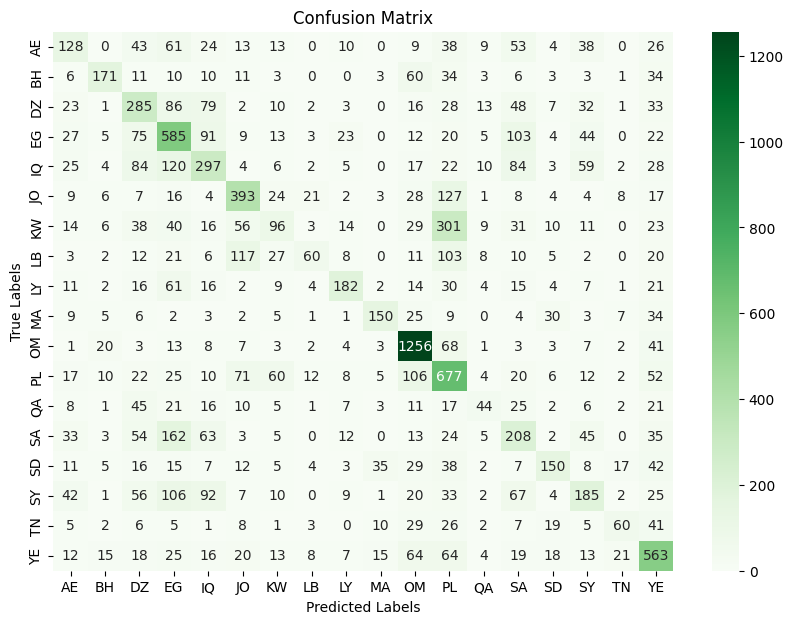

Classification Report:
              precision    recall  f1-score   support

          AE       0.33      0.27      0.30       469
          BH       0.66      0.46      0.54       369
          DZ       0.36      0.43      0.39       669
          EG       0.43      0.56      0.48      1041
          IQ       0.39      0.38      0.39       772
          JO       0.53      0.58      0.55       682
          KW       0.31      0.14      0.19       697
          LB       0.48      0.14      0.22       415
          LY       0.61      0.45      0.52       401
          MA       0.65      0.51      0.57       296
          OM       0.72      0.87      0.79      1445
          PL       0.41      0.61      0.49      1119
          QA       0.35      0.18      0.24       245
          SA       0.29      0.31      0.30       667
          SD       0.54      0.37      0.44       406
          SY       0.38      0.28      0.32       662
          TN       0.48      0.26      0.34       230
    

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

lstm = keras.models.load_model("LSTm_selfattention22.h5")
y_pred = np.argmax(lstm_model52.predict(x_test), axis=1)

if y_test.ndim > 1:  # Check if one-hot encoded
    y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, y_pred)

classes = ["AE", "BH", "DZ", "EG", "IQ", "JO", "KW", "LB", "LY", "MA", "OM", "PL", "QA", "SA", "SD", "SY", "TN", "YE"]
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Step 6: Optional: Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=classes))

LSTM self attention

In [ ]:
# saved_file_limitization = "dataset_preprocessed_limitization.csv"
# _ = arabic_preprocess_pipline(original_file, saved_file_limitization, id_col, text_c, dialects_col, labels_encoded=False ,using_lemma=True)